In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from collections import Counter
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bioinfokit.visuz import cluster
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import randint, loguniform


In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.shape

(13611, 17)

In [ ]:
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

In [ ]:
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
#check null value
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

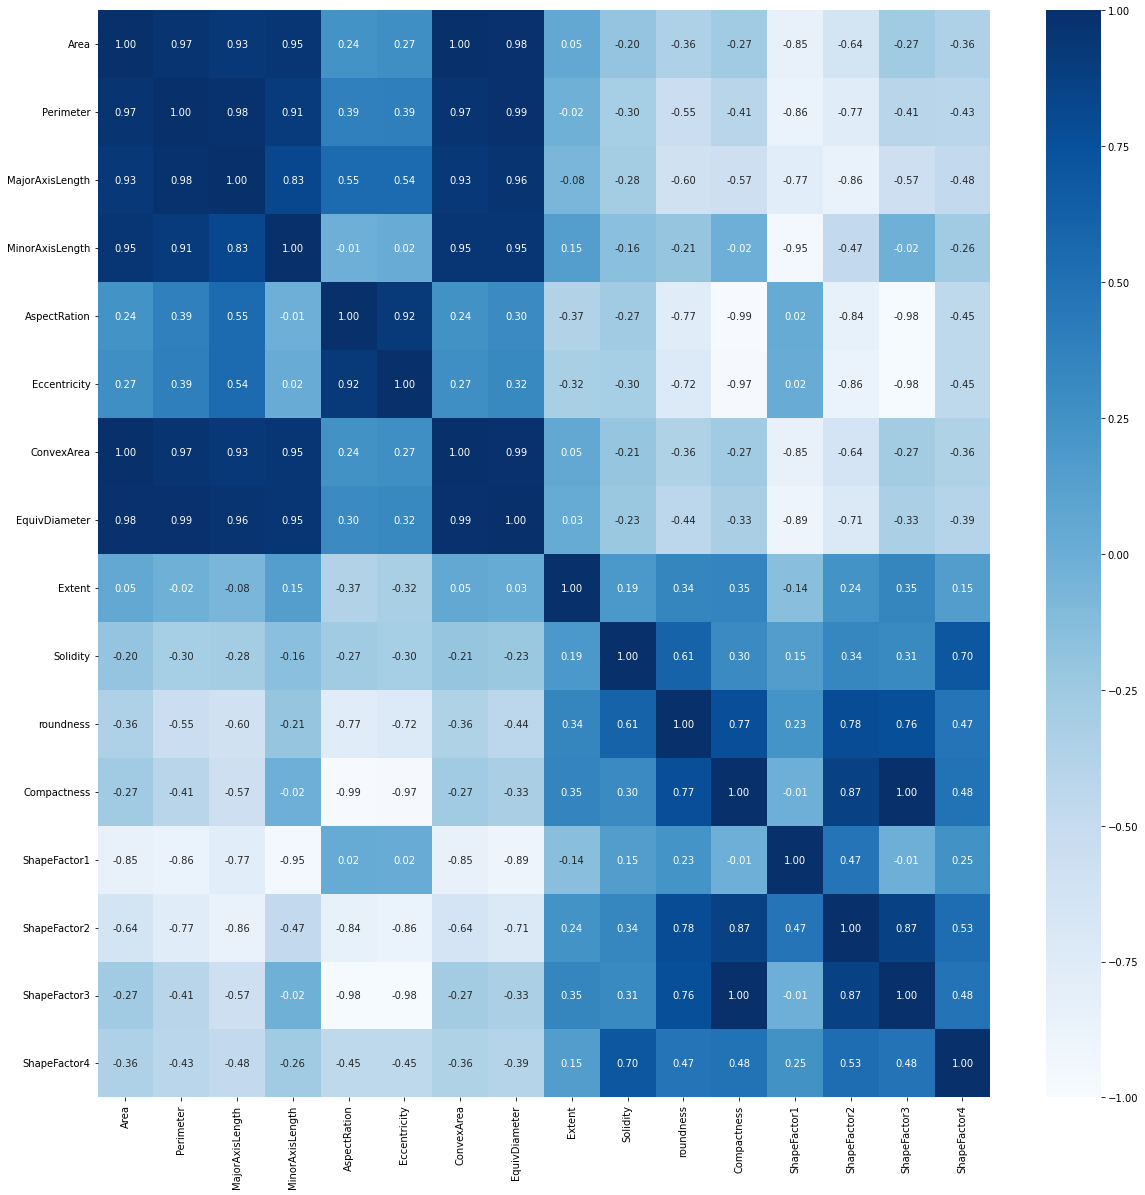

In [ ]:
#check correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="Blues",fmt=".2f",vmin=-1.00,vmax=1.00)
plt.show()

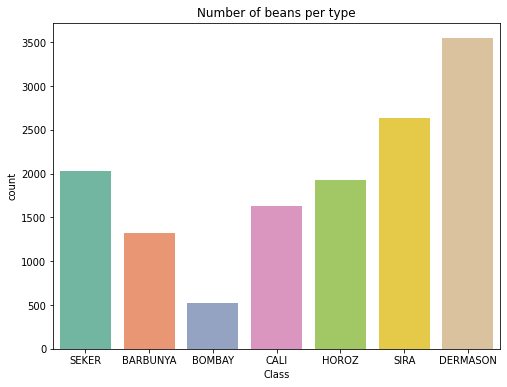

In [ ]:
#display beans per type
plt.figure(figsize=(8,6))
sns.countplot(x=df["Class"],palette="Set2")
plt.title("Number of beans per type")
plt.show()

In [ ]:
#display distibutions and outliet
numerical_features=df.select_dtypes(include=[np.number]).columns
print("numerical features:",numerical_features)
numerical_features=numerical_features.tolist()

numerical features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


Area
Skewness :  2.953


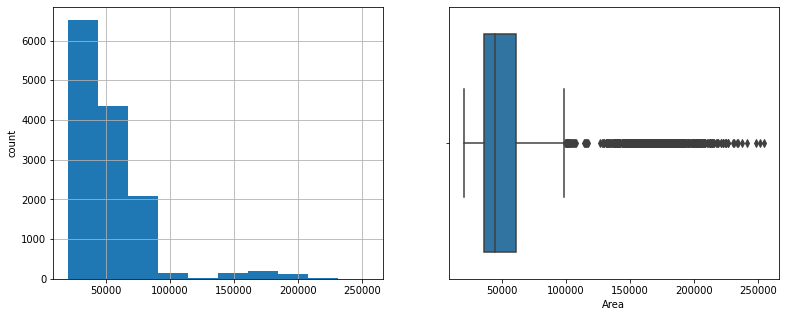

Perimeter
Skewness :  1.626


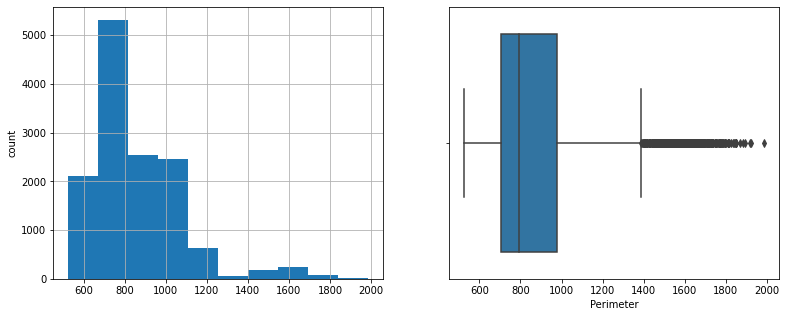

MajorAxisLength
Skewness :  1.358


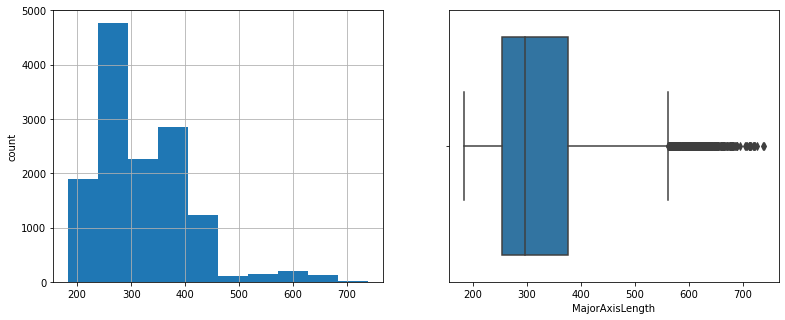

MinorAxisLength
Skewness :  2.238


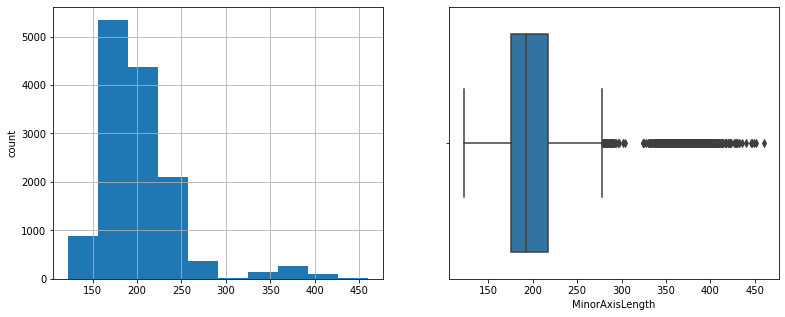

AspectRation
Skewness :  0.583


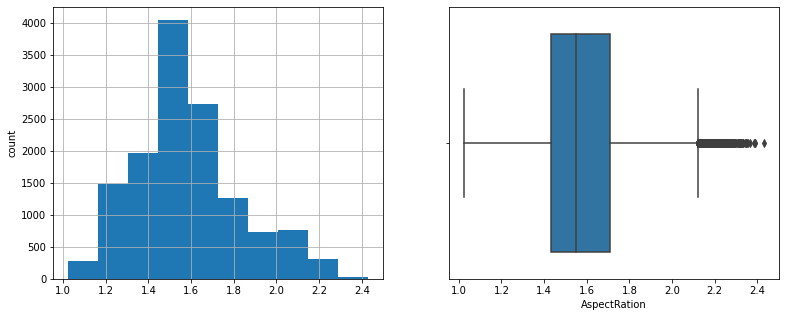

Eccentricity
Skewness :  -1.063


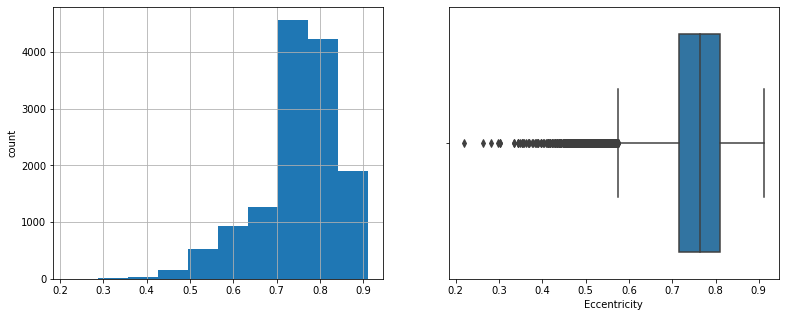

ConvexArea
Skewness :  2.942


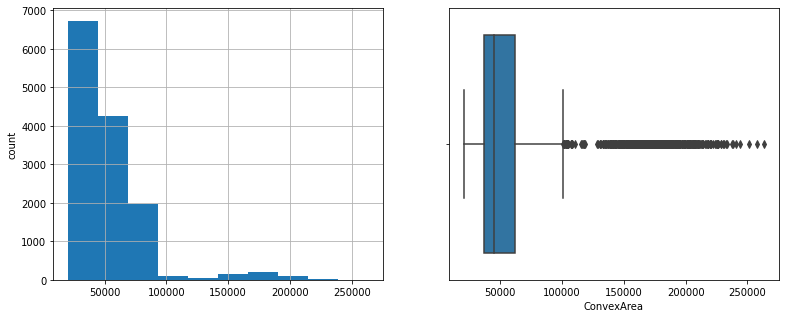

EquivDiameter
Skewness :  1.949


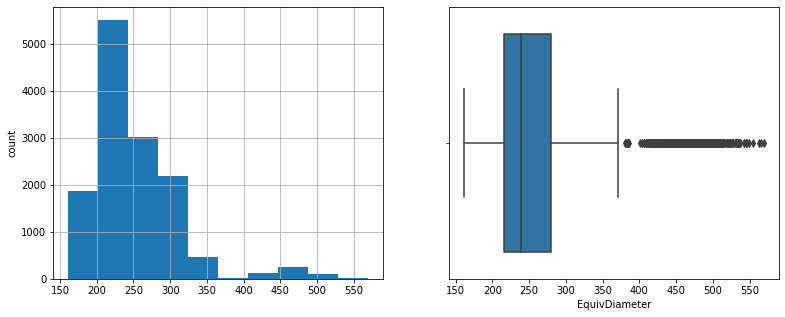

Extent
Skewness :  -0.895


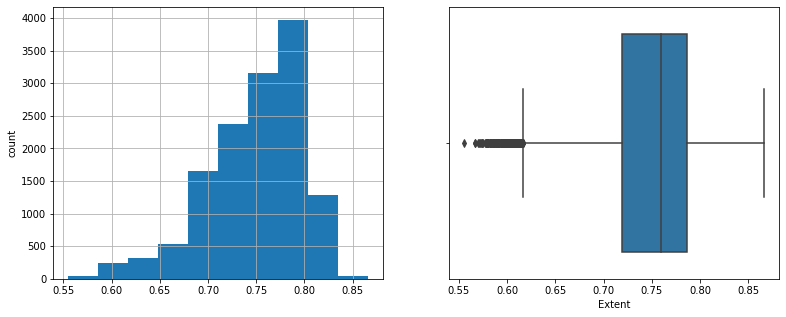

Solidity
Skewness :  -2.55


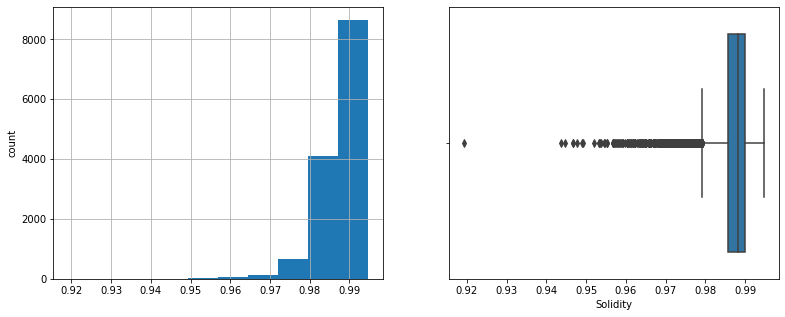

roundness
Skewness :  -0.636


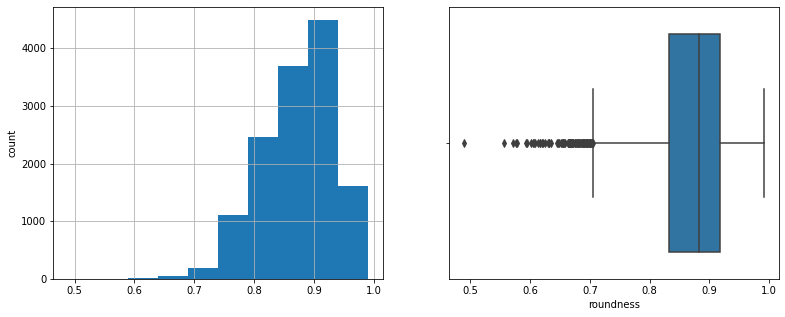

Compactness
Skewness :  0.037


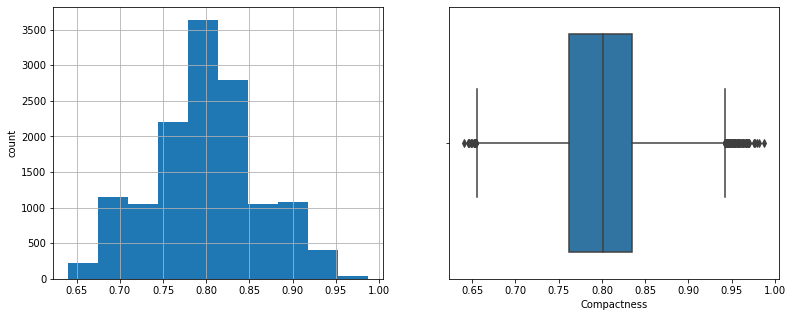

ShapeFactor1
Skewness :  -0.534


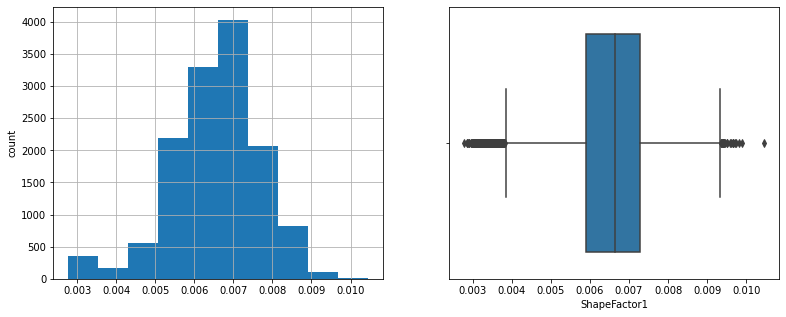

ShapeFactor2
Skewness :  0.301


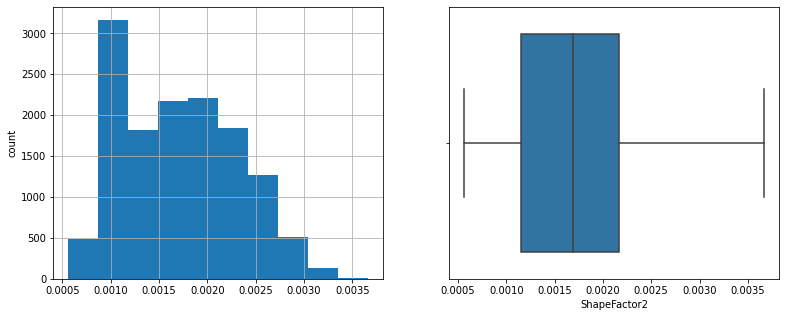

ShapeFactor3
Skewness :  0.242


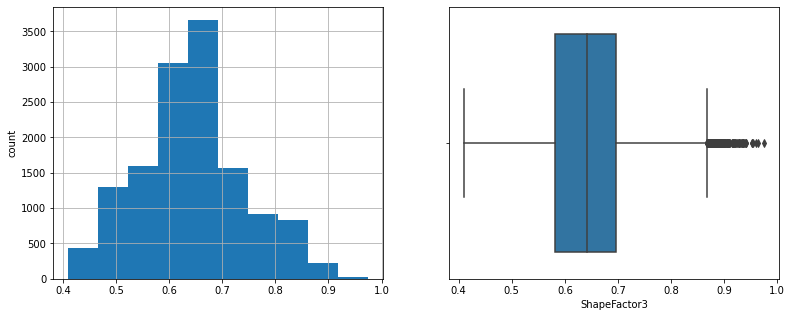

ShapeFactor4
Skewness :  -2.759


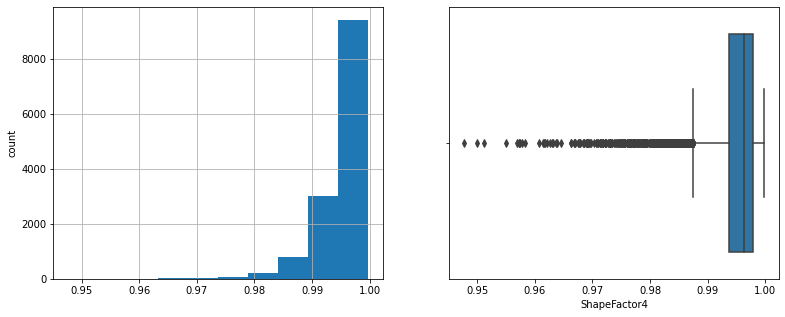

In [ ]:
for i in numerical_features:
  print(i)
  print('Skewness : ' , round(df[i].skew(),3))
  plt.figure(figsize = (13,5))
  plt.subplot(1,2,1)
  df[i].hist()
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x = df[i])
  plt.show()



In [ ]:
X = df.drop("Class", axis=1)
Y = df['Class']


In [ ]:
print(X.shape)
print(Y.shape)

(13611, 16)
(13611,)


In [ ]:
# Detect  outliers in the dataset


def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

In [ ]:
data = df.drop(detect_outliers(df,['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                                       'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                       'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']), axis=0).reset_index(drop=True)
print('Number of of samples in the dataset after removing outliers: %d' % len(data))


Number of of samples in the dataset after removing outliers: 12218


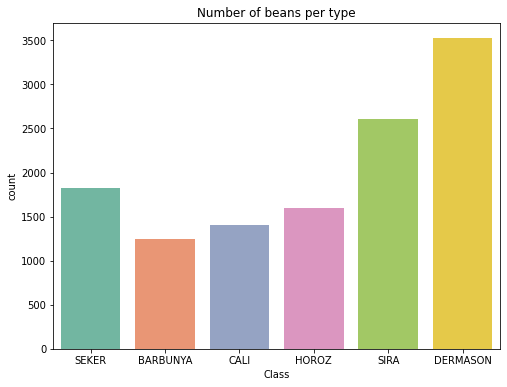

In [ ]:
# Bar Chart to visualize the labels in the output variable
plt.figure(figsize=(8,6))
sns.countplot(x=data["Class"],palette="Set2")
plt.title("Number of beans per type")
plt.show()

In [ ]:
# Convert Class String labels into Integers
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
label_Y = lab_enc.fit_transform(Y)


In [ ]:
# Normalize the input features of the dataset
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
norm_X = normalizer.fit_transform(X)


In [ ]:
############## Feature Extraction ##################
####################################################
from sklearn.decomposition import PCA

# Visualizing the Principal Components in the feature space
pca = PCA()
pca.fit(norm_X)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Screeplot of Principal Components
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])


In [ ]:
# 2D Bi-plot of Principal Components
pca_scores = PCA().fit_transform(norm_X)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=Y)



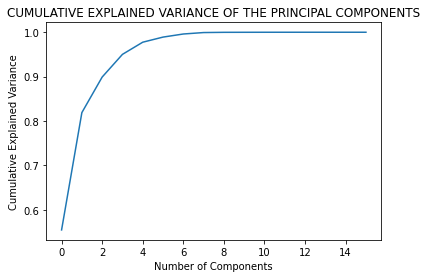

In [ ]:
# Cumulative Explained Variance Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_)); plt.title('CUMULATIVE EXPLAINED VARIANCE OF THE PRINCIPAL COMPONENTS')
plt.xlabel('Number of Components'); plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
#machine learning
def training_model_metrics(model, X, Y):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    model_acc = metrics.accuracy_score(test_y, y_pred)
    f1_measure = metrics.f1_score(test_y, y_pred, average='macro')
    model_precision = metrics.precision_score(test_y, y_pred, average='macro')
    model_recall = metrics.recall_score(test_y, y_pred, average='macro')
    print('Accuracy: %.3f, f1 measure: %.3f, precision: %.3f, recall: %.3f' % (model_acc, f1_measure, model_precision, model_recall))
    metrics.plot_confusion_matrix(model, test_x, test_y);plt.show()

In [ ]:
def optimize_param(model, param, X_optim, Y_optim):
    rf_grid = RandomizedSearchCV(estimator=model, n_iter=30, param_distributions=param, scoring='f1_macro', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
    print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
    print('-----------------------------------------------------------------------')
    training_model_metrics(rf_grid, X_optim, Y_optim)
    print('The hyper-parameters with the best f1_macro performance:')
    print('----------------------------------------------------------')
    print(rf_grid.best_params_)


In [ ]:
def evaluate_PC(model, user_input, user_output):
    train_x, test_x, train_y, test_y = train_test_split(user_input, user_output, test_size=0.2, random_state=12, shuffle=True)
    acc, comp = list(), list()

    for n in range(1, 16):
        pca = PCA(n_components=n)
        pca.fit(train_x)
        pca_transform = pca.fit_transform(train_x)
        cv = KFold(n_splits=5, shuffle=True, random_state=12)
        scores = cross_val_score(model, pca_transform, train_y, scoring='f1_macro', cv=cv, n_jobs=-1)
        acc.append(np.mean(scores))
        comp.append(n)
        print('> No of Components=%d, Accuracy=%.3f' % (n, np.mean(scores)))

    return acc, comp


In [ ]:
def display_perf_plot(acc, comp):
    plt.plot(comp, acc)
    plt.title('PRINCIPAL COMPONENT ANALYSIS PERFORMANCE PLOT USING CROSS-VALIDATION')
    plt.axhline(y=max(acc), color='r', linestyle='--')
    plt.xlabel('NUMBER OF COMPONENTS')
    plt.ylabel('F1-MEASURE')
    plt.show()


In [ ]:
def KFold_evaluation(model, X, Y):
    means, mins, maxs = list(), list(), list()
    folds = range(2, 13)
    for k in folds:
        cv = KFold(n_splits=k, shuffle=True, random_state=12)
        scores = cross_val_score(model, X, Y, scoring='f1_macro', cv=cv, n_jobs=-1)
        means.append(np.mean(scores))
        mins.append(np.mean(scores) - scores.min())
        maxs.append(scores.max() - np.mean(scores))
    plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
    plt.title('CROSS-VALIDATION PERFORMANCE EVALUATION')
    plt.xlabel('NUMBER OF FOLDS')
    plt.ylabel('F1-MEASURE')
    plt.axhline(y=max(means), color='r', linestyle='--')
    plt.show()

In [ ]:
###################################################
############ Random Forest Classification ##########
####################################################
print('******************RANDOM FOREST CLASSIFICATION MODEL**************************')
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
rf_model = RandomForestClassifier(random_state=12)

print('Performance metrics for Random Forest Classification of Original Data')
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(rf_model, norm_X, label_Y)


In [ ]:
# Using GridSearch to optimize the hyper-parameters in Random Forest Classification Model
from scipy.stats import randint, loguniform

n_estimators = randint(100, 2000)
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]
max_depth.append(None)
min_samples_split = randint(2, 20)
min_samples_leaf = randint(1, 15)

grid_param = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(rf_model, grid_param, norm_X, label_Y)

# PCA Dimensionality Reduction to 8 PCs
print('DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS')
print('-----------------------------------------------------------------------')
print('Performance metrics for Random Forest Classification of Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_rf = PCA(n_components=8).fit_transform(norm_X)
training_model_metrics(rf_model, pca_rf, label_Y)

In [ ]:
# Applying SMOTE technique on the dataset
sm = SMOTE(random_state=12)
X_sm, Y_sm = sm.fit_resample(norm_X, label_Y)

# Bar Chart to visualize the labels in the output variable in the SMOTE Balanced Dataset
Y_balanced = lab_enc.inverse_transform(Y_sm)
Y_balanced = pd.Index(Y_balanced, name='Class')
var = Y_balanced
varValue = var.value_counts()
plt.figure(figsize=(9, 3));plt.bar(varValue.index, varValue, color= "blue", edgecolor="yellow", linewidth="2");plt.xticks(varValue.index, varValue.index.values);plt.ylabel("Frequency");plt.title('Class');plt.show()

print('-----------------------------------------------------------------------')
print('Performance metrics for Random Forest Classification of SMOTE Balanced Data')
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(rf_model, X_sm, Y_sm)


In [ ]:
# Optimize hyper-parameters and display performance metrics for RF model trained using SMOTE data
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(rf_model, grid_param, X_sm, Y_sm)

# PCA Dimensionality Reduction to 8 PCs
print('Performance metrics for Random Forest Classification of SMOTE Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_rfsm = PCA(n_components=8).fit_transform(X_sm)

training_model_metrics(rf_model, pca_rfsm, Y_sm)


In [ ]:
####################################################
############ Support Vector Machines ###############
####################################################
print('******************SUPPORT VECTOR MACHINE CLASSIFICATION MODEL**************************')
svm_model = svm.SVC(random_state=12)
print('Performance metrics for Support Vector Machine Classification of Original Data')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(svm_model, norm_X, label_Y)





# Applying SMOTE technique on the dataset
print('-----------------------------------------------------------------------')
print('Performance metrics for Support Vector Machine Classification of SMOTE Balanced Data')
print('-----------------------------------------------------------------------')
sm = SMOTE(random_state=12)
X_sm_svm, Y_sm_svm = sm.fit_resample(norm_X, label_Y)
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(svm_model, X_sm_svm, Y_sm_svm)



In [ ]:
# Using GridSearch to optimize the hyper-parameters in Support Vector Machine Classification Model
svm_C = [0.1, 1, 10, 100, 1000]
svm_gamma = [1, 0.1, 0.001, 0.00001]
svm_kernel = ['poly', 'rbf', 'linear', 'sigmoid']
svm_degree = randint(1, 10)

svm_param = {'C': svm_C,
             'gamma': svm_gamma,
             'kernel': svm_kernel,
             'degree': svm_degree}

print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(svm_model, svm_param, norm_X, label_Y)


In [ ]:
# PCA Dimensionality Reduction to 8 PCs
print('DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS')
print('-----------------------------------------------------------------------')
print('Performance metrics for Support Vector Machine Classification of Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_svm = PCA(n_components=8).fit_transform(norm_X)
training_model_metrics(svm_model, pca_svm, label_Y)


In [ ]:
# Applying SMOTE technique on the dataset
print('-----------------------------------------------------------------------')
print('Performance metrics for Support Vector Machine Classification of SMOTE Balanced Data')
print('-----------------------------------------------------------------------')
sm = SMOTE(random_state=12)
X_sm_svm, Y_sm_svm = sm.fit_resample(norm_X, label_Y)
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
print('-----------------------------------------------------------------------')
training_model_metrics(svm_model, X_sm_svm, Y_sm_svm)


In [ ]:
# Optimize hyper-parameters and display performance metrics for SVM model trained using SMOTE data
print('-----------------------------------------------------------------------')
print('Performance Metrics for ML Model of Dataset using optimized hyper-parameters')
print('-----------------------------------------------------------------------')
optimize_param(svm_model, svm_param, X_sm_svm, Y_sm_svm)



In [ ]:
# PCA Dimensionality Reduction to 8 PCs
print('Performance metrics for Support Vector Machine Classification of SMOTE Dataset using 8 Principal Components')
print('-----------------------------------------------------------------------')
pca_sm_svm = PCA(n_components=8).fit_transform(X_sm_svm)
training_model_metrics(svm_model, pca_sm_svm, Y_sm_svm)
